In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.impute import KNNImputer

In [4]:
# Load the dataset
file_path = '/content/Median.csv'

In [6]:
data = pd.read_csv(file_path)

In [7]:
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 67 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   left_wrist_x        600 non-null    float64
 1   left_wrist_y        600 non-null    float64
 2   left_wrist_z        600 non-null    float64
 3   left_shoulder_x     600 non-null    float64
 4   left_shoulder_y     600 non-null    float64
 5   left_shoulder_z     600 non-null    float64
 6   Left_Elbow_x        600 non-null    float64
 7   Left_Elbow_y        600 non-null    float64
 8   Left_Elbow_z        600 non-null    float64
 9   right_wrist_x       600 non-null    float64
 10  right_wrist_y       600 non-null    float64
 11  right_wrist_z       600 non-null    float64
 12  right_shoulder_x    600 non-null    float64
 13  right_shoulder_y    600 non-null    float64
 14  right_shoulder_z    600 non-null    float64
 15  right_Elbow_x       600 non-null    float64
 16  right_El

(   left_wrist_x  left_wrist_y  left_wrist_z  left_shoulder_x  left_shoulder_y  \
 0      0.323951      0.332911     -0.755198         0.663686         0.318891   
 1      0.272184      0.361283     -0.637199         0.650201         0.316016   
 2      0.215437      0.400002     -0.424551         0.480813         0.323377   
 3      0.196623      0.346623     -0.496392         0.488786         0.320572   
 4      0.292822      0.341510     -0.759578         0.663017         0.318157   
 
    left_shoulder_z  Left_Elbow_x  Left_Elbow_y  Left_Elbow_z  right_wrist_x  \
 0        -0.619970      0.488512      0.336811     -0.767087       0.273306   
 1        -0.577316      0.452138      0.339617     -0.687635       0.420374   
 2        -0.521453      0.379718      0.412420     -0.552115       0.425109   
 3        -0.534602      0.341294      0.385648     -0.590703       0.434677   
 4        -0.640058      0.475337      0.340112     -0.765823       0.287355   
 
    ...  right_heel_x  r

In [8]:
data.isnull().sum()

left_wrist_x          0
left_wrist_y          0
left_wrist_z          0
left_shoulder_x       0
left_shoulder_y       0
                     ..
left_foot_index_z     0
right_foot_index_x    0
right_foot_index_y    0
right_foot_index_z    0
label                 0
Length: 67, dtype: int64

In [12]:
X = data.drop(columns=['label'])
y = data['label']

In [13]:
# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)

# Cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=skf)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.90833333 0.875      0.85833333 0.89166667 0.90833333]


In [14]:
# Grid Search for parameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],  # Including shallower trees
    'min_samples_leaf': [2, 4, 6, 8],  # Larger values
    'max_features': ['auto', 'sqrt', 0.5],  # Including a fractional value
    'min_samples_split': [10, 20]  # New parameter
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)
print("Best Grid Search Parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Grid Search Parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [15]:
# Building and training the Random Forest Classifier
best_model = grid_search.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
best_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [16]:
# Calculate accuracy and generate classification reports
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Training Classification Report:\n", classification_report(y_train, y_pred_train))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test))

Training Accuracy: 0.8952380952380953
Testing Accuracy: 0.9166666666666666
Training Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.92      0.91        63
           2       0.92      0.90      0.91        68
           3       0.91      0.87      0.89        67
           4       0.89      0.93      0.91        80
           5       0.90      0.86      0.88        72
           6       0.86      0.90      0.88        70

    accuracy                           0.90       420
   macro avg       0.90      0.89      0.90       420
weighted avg       0.90      0.90      0.90       420

Testing Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.89      0.90        37
           2       0.88      0.91      0.89        32
           3       0.94      0.91      0.92        33
           4       0.86      0.90      0.88        20
           5       0.90      1.00      0.95   

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", mse)

# Compare predicted values with actual values visually
print("Predicted\tActual")
for i in range(len(y_test)):
    print(f"{y_pred_test[i]}\t\t{y_test.iloc[i]}")

Mean Squared Error: 0.08333333333333333
Predicted	Actual
1		1
6		6
6		6
2		2
1		2
3		3
1		1
6		6
1		1
4		4
2		2
1		1
2		2
5		5
4		4
3		3
1		1
3		3
1		1
1		1
2		1
6		6
6		6
5		5
3		3
6		6
1		1
2		2
5		5
6		6
6		6
2		2
2		1
4		4
1		1
6		6
1		1
6		6
5		6
4		4
3		3
2		2
5		5
5		5
1		1
2		1
6		6
1		1
2		2
5		5
4		4
3		3
1		2
6		6
6		6
3		3
4		4
2		2
2		2
2		2
1		1
1		1
4		4
5		5
5		5
1		1
5		6
6		6
1		2
3		3
3		3
1		1
6		6
3		3
6		6
6		6
3		3
3		3
6		6
5		5
3		3
5		5
5		5
3		4
2		2
2		2
2		2
3		3
3		3
3		3
4		4
5		5
1		1
3		3
4		4
4		3
3		3
2		2
5		5
2		2
1		1
3		3
5		5
4		4
2		2
5		5
1		1
3		4
3		3
5		5
2		2
5		5
6		6
5		5
4		4
4		4
3		3
1		1
5		5
6		6
2		2
2		2
4		4
6		6
1		1
2		2
5		5
4		3
5		5
5		5
1		1
5		5
2		2
2		2
5		5
1		1
2		2
1		1
3		3
1		1
2		2
3		3
1		1
1		1
6		6
2		2
4		3
6		6
2		2
1		1
6		6
6		6
4		4
3		3
5		5
3		3
2		1
5		5
1		1
2		2
4		4
4		4
1		1
6		6
3		3
1		1
4		4
3		3
5		6
3		3
3		3
4		4
5		5
5		5
2		2
1		1
6		6
1		1
2		2
3		3


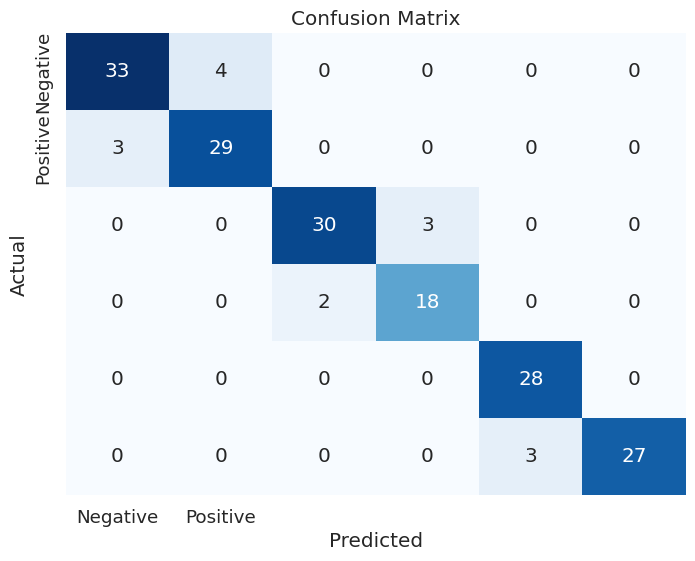

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and y_pred_test are your true and predicted labels, respectively

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Define class labels
class_names = ['Negative', 'Positive']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


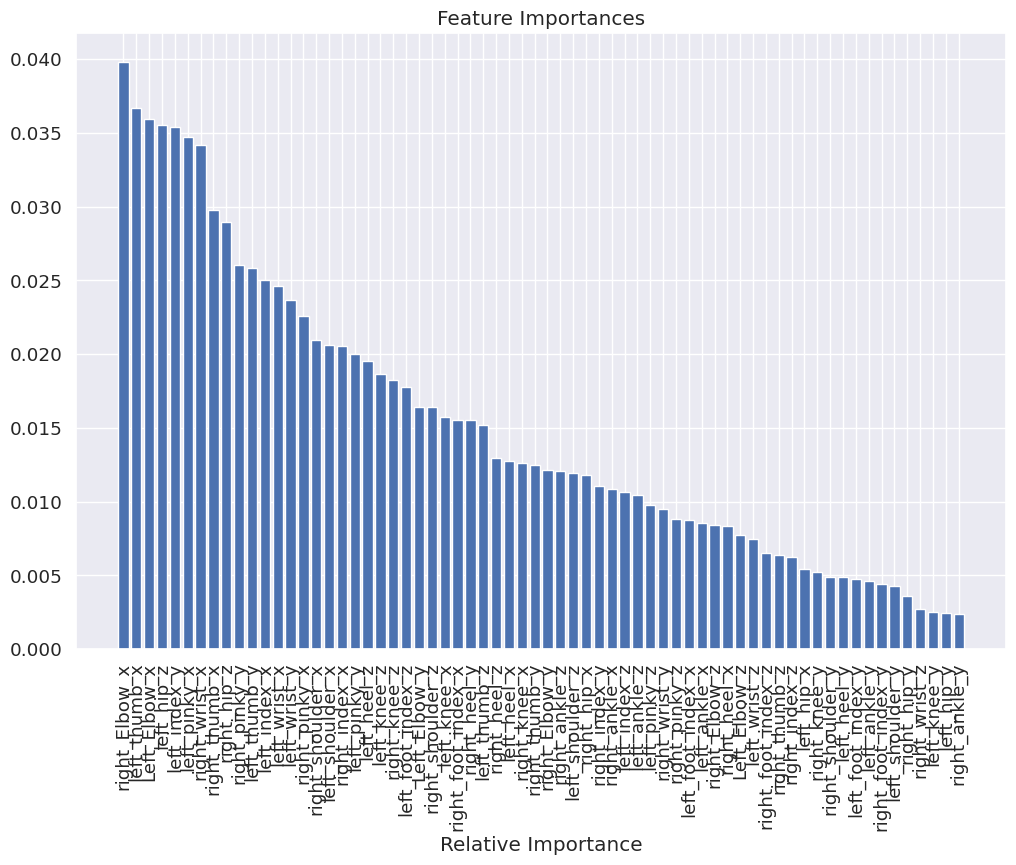

In [19]:
# Feature Importance Plot
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Relative Importance')
plt.show()

In [21]:
# Printing actual vs predicted responses
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
print(results_df.head(10))  # Adjust the number to display as many results as needed

     Actual  Predicted
110       1          1
419       6          6
565       6          6
77        2          2
181       2          1
284       3          3
10        1          1
469       6          6
78        1          1
349       4          4
